## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats
import pylab
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Loading and Transforming Data

In [2]:
# Importing the Data
file_name = Path('./Data/Index2018.csv')
df = pd.read_csv(file_name, parse_dates=True, index_col='date', infer_datetime_format=True, dayfirst=True) 
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [4]:
df = df.fillna(method='ffill')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## S&P500 Data Only

In [5]:
# SPX data
spx_data = df['spx'].to_frame()

# Train and Test Split
train_size = int(len(spx_data)*0.8)
train_spx = spx_data.iloc[:train_size]
test_spx = spx_data.iloc[train_size:]

# White Noise

In [6]:
wn_data = np.random.normal(loc=train_spx.mean(), scale=train_spx.std(), size=len(train_spx))

In [7]:
train_spx['wn'] = wn_data

In [8]:
train_spx.describe()

,spx,wn
count,5021.000000,5021.000000
mean,1091.651926,1089.263882
std,292.559287,293.846133
min,438.920000,108.742042
25%,914.620000,894.149095
50%,1144.650000,1084.884248
75%,1316.280729,1287.409232
max,1570.252238,2209.574826


Observation

Here mean and std is slightly different eventhough we set the same values as train_spx, because white noise data here at come from normal distribution and not from spx distribution

Text(0.5, 1.0, 'White Noise Time Series')

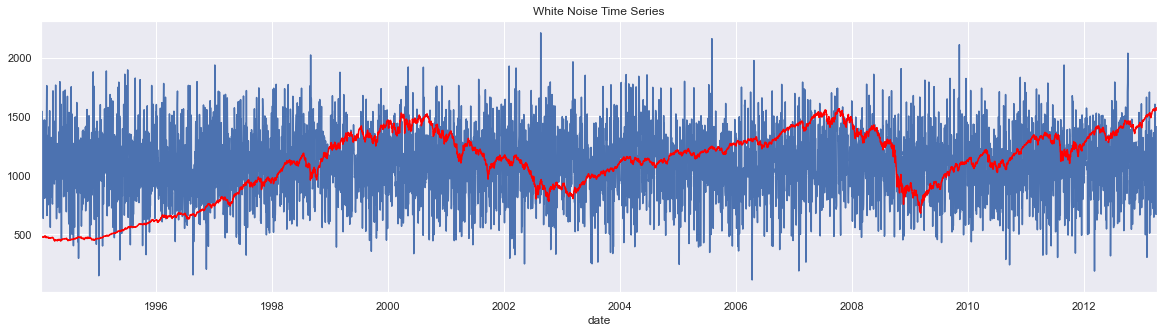

In [9]:
train_spx['wn'].plot(figsize=(20,5))
train_spx['spx'].plot(c='red')
plt.title("White Noise Time Series")

Observation

Smaller jumps between periods for SPX values

We can clearly see that SPX data is not RANDOM so that means we have to recognise this pattern for accurate forcasting